# Logistic Regression
---
# Imports

In [47]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss
import seaborn as sn
import pandas as pd

# Data

In [48]:
weights = np.array([10, 15, 20, 21, 35, 39, 51, 58, 101, 110, 125, 149, 201, 220, 225]).reshape(15,1)
is_horse = np.array([0,0,0,1,0,1,1,0,0,1,1,0,1,1,1])

In [49]:
weights.shape, is_horse.shape

((15, 1), (15,))

# Model

In [50]:
model = LogisticRegression(solver='lbfgs').fit(weights, is_horse)

In [51]:
model.intercept_, model.coef_

(array([-1.16900597]), array([[0.01525125]]))

# Manual

In [52]:
def logit(weight):
    B0 = model.intercept_[0]
    B1 = model.coef_[0][0]
    return B0 + B1 * weight # ln(p/1-p)

In [53]:
def sigmoid(x):
    return 1 / (1 + (np.exp(- logit(x)))) # p(x)

In [54]:
logodds = logit(10)
logodds

-1.0164934541913047

In [55]:
p = sigmoid(10)
p

0.26571099569135126

In [56]:
np.log(p/(1-p))

-1.0164934541913047

In [57]:
# all probabilities
# p(horse | weight) ~ Binomial(p=0.5)
sigmoid(weights)

array([[0.265711  ],
       [0.28085243],
       [0.29650828],
       [0.2996994 ],
       [0.34632964],
       [0.36026661],
       [0.40343035],
       [0.42936721],
       [0.59179008],
       [0.62448565],
       [0.67642714],
       [0.75090232],
       [0.86949438],
       [0.8990097 ],
       [0.9057255 ]])

In [58]:
(sigmoid(weights) > 0.5).astype('int8').reshape(15)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

# Automatic

In [59]:
model.predict(weights)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [60]:
model.predict_proba(weights)[:,1]

array([0.265711  , 0.28085243, 0.29650828, 0.2996994 , 0.34632964,
       0.36026661, 0.40343035, 0.42936721, 0.59179008, 0.62448565,
       0.67642714, 0.75090232, 0.86949438, 0.8990097 , 0.9057255 ])

In [61]:
np.log(model.predict_proba(weights)[:,1])

array([-1.32534604, -1.2699259 , -1.21568012, -1.2049753 , -1.06036425,
       -1.02091093, -0.90775143, -0.84544276, -0.5246033 , -0.47082692,
       -0.39093053, -0.2864797 , -0.13984341, -0.10646146, -0.09901899])

In [62]:
model.predict_log_proba(weights)[:,1]

array([-1.32534604, -1.2699259 , -1.21568012, -1.2049753 , -1.06036425,
       -1.02091093, -0.90775143, -0.84544276, -0.5246033 , -0.47082692,
       -0.39093053, -0.2864797 , -0.13984341, -0.10646146, -0.09901899])

In [63]:
model.classes_

array([0, 1])

# Graph

In [64]:
# at what weight is the probability 0.5
# midpoint = -B0 + ln(p/1-p) / B1
midpoint = ((- model.intercept_[0]) + 0 ) / model.coef_[0][0] 
midpoint

76.64983952663589

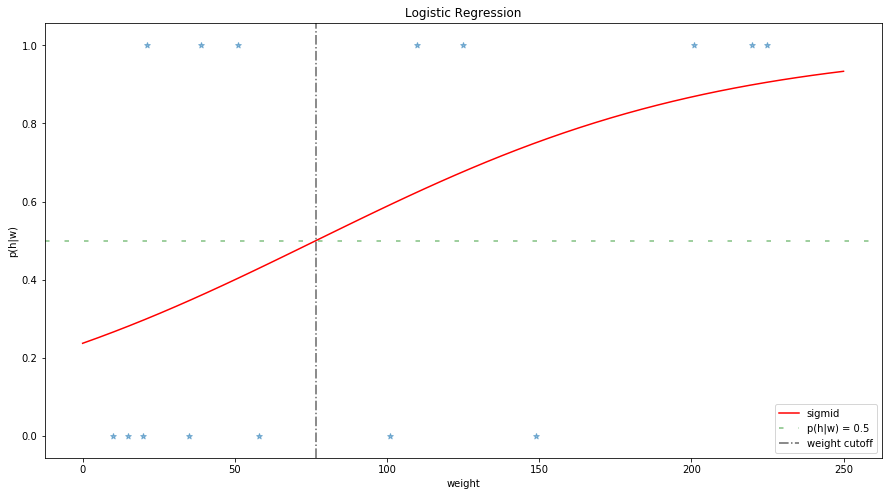

In [65]:
plt.figure(figsize = (15,8))
plt.scatter(weights, is_horse, marker='*', alpha=0.5)
plt.plot(np.linspace(0, 250), model.predict_proba(np.linspace(0, 250).reshape(50,1))[:,1], label='sigmid', color='r')
plt.axhline(0.5, color='g', alpha=0.5, linestyle='--', dashes=(3,10), label='p(h|w) = 0.5')
plt.axvline(midpoint, color='k', alpha=0.6, linestyle='-.', label='weight cutoff')
plt.xlabel('weight')
plt.ylabel('p(h|w)')
plt.title('Logistic Regression')
plt.legend()
plt.show()

# Classification Metrics

In [66]:
y = is_horse
y_hat = model.predict(weights)
p_hat = model.predict_proba(weights)[:,1]

In [67]:
log_loss(y, p_hat)

0.5735336539213267

In [68]:
# discuss true positives, false positives, true negatives and false negatives
# what would you rather avoid, false positive or false negative

In [69]:
pred_neg = (y == y_hat)[p_hat < 0.5]
pred_pos = (y == y_hat)[p_hat > 0.5]
pred_neg, pred_pos

(array([ True,  True,  True, False,  True, False, False,  True]),
 array([False,  True,  True, False,  True,  True,  True]))

In [70]:
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()

In [71]:
TN, FN, TP, FP

(5, 3, 5, 2)

In [72]:
cm = confusion_matrix(y, y_hat)
cm

array([[5, 2],
       [3, 5]])

In [73]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
accuracy

0.6666666666666666

In [74]:
accuracy_score(y, y_hat)

0.6666666666666666

In [75]:
precison = TP / (TP + FP)
precison

0.7142857142857143

In [76]:
precision_score(y, y_hat)

0.7142857142857143

In [77]:
recall = TP / (TP + FN)
recall

0.625

In [78]:
recall_score(y, y_hat)

0.625

In [79]:
cmdf = pd.DataFrame(cm, index=['Predict Dog','Predict Horse'], columns=['Actual Dog', 'Actual Horse'])
cmdf

,Actual Dog,Actual Horse
Predict Dog,5,2
Predict Horse,3,5


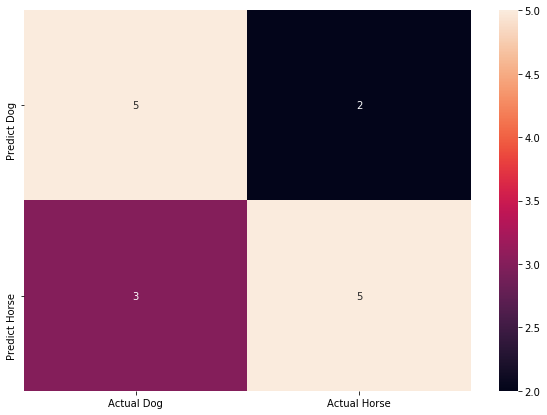

In [80]:
plt.figure(figsize = (10,7))
sn.heatmap(cmdf, annot=True)
plt.show()

In [81]:
auc = roc_auc_score(y, p_hat)
auc

0.7857142857142857

In [82]:
# tpr = tp / tp + fn
# fpr = fp / fp + tn

In [83]:
# do manual ROC curve using pen/paper
# compare to results below

In [84]:
fpr, tpr, thr = roc_curve(y, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

1.91 0.00 0.00
0.91 0.00 0.12
0.87 0.00 0.38
0.75 0.14 0.38
0.62 0.14 0.62
0.43 0.43 0.62
0.36 0.43 0.88
0.35 0.57 0.88
0.30 0.57 1.00
0.27 1.00 1.00


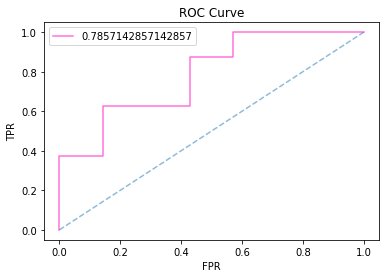

In [85]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()